In [29]:
# Import dataset
import numpy as np
#import pandas as pd
from scipy.optimize import minimize
# train_X = pd.read_csv('../p1Data/train_X.csv',header=None)
# train_y = pd.read_csv('../p1Data/train_y.csv',header=None)
# validation_X = pd.read_csv('../p1Data/validation_X.csv',header=None)
# validation_y = pd.read_csv('../p1Data/validation_y.csv',header=None)
train_X = np.genfromtxt('../p1Data/train_X.csv',delimiter=',')
train_y = np.genfromtxt('../p1Data/train_y.csv',delimiter=',')
validation_X = np.genfromtxt('../p1Data/validation_X.csv',delimiter=',')
validation_y = np.genfromtxt('../p1Data/validation_y.csv',delimiter=',')
test_X = np.genfromtxt('../p1Data/test_X.csv',delimiter=',')
test_y = np.genfromtxt('../p1Data/test_y.csv',delimiter=',')

\newpage

# 3_1_1

In [24]:
import time

In [52]:
# Calculate closed form solution for lasso regression using Shooting Algorithm
def lasso_shooting(X,y,lambda_reg=0.1,max_steps = 1000,tolerence = 1e-5):
    start_time = time.time()
    converge = False
    steps = 0
    #Get dimension info
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.linalg.inv(X.T.dot(X)+lambda_reg*np.identity(d)).dot(X.T).dot(y) # result w dimension: d
    def soft(a,delta):
        sign_a = np.sign(a)
        if np.abs(a)-delta <0:
            return 0 
        else:
            return sign_a*(abs(a)-delta)
    while converge==False and steps<max_steps:
        a = []
        c = []
        old_w = w
    ####For loop for computing aj cj w
        for j in range(d):
            aj = 0
            cj = 0
            for i in range(n):
                xij = X[i,j]
                aj += 2*xij*xij
                cj += 2*xij*(y[i]-w.T.dot(X[i,:])+w[j]*xij)
            w[j] = soft(cj/aj,lambda_reg/aj)
            convergence = np.sum(np.abs(w-old_w))<tolerence
            a.append(aj)
            c.append(cj)
        steps +=1
        a = np.array(a)
        c = np.array(c)
    run_time = time.time()-start_time
    print('lambda:',lambda_reg,'run_time:',run_time,'steps_taken:',steps)
    return w,a,c

lambda: 0.1 run_time: 16.355605602264404 steps_taken: 1000
lambda: 0.2 run_time: 17.021519422531128 steps_taken: 1000
lambda: 0.3 run_time: 17.161158084869385 steps_taken: 1000
lambda: 0.4 run_time: 17.454284191131592 steps_taken: 1000
lambda: 0.5 run_time: 17.41083812713623 steps_taken: 1000
lambda: 0.6 run_time: 17.356815814971924 steps_taken: 1000
lambda: 0.7 run_time: 17.236926794052124 steps_taken: 1000
lambda: 0.8 run_time: 17.2065269947052 steps_taken: 1000
lambda: 0.9 run_time: 17.269866466522217 steps_taken: 1000
lambda: 1.0 run_time: 17.64631462097168 steps_taken: 1000


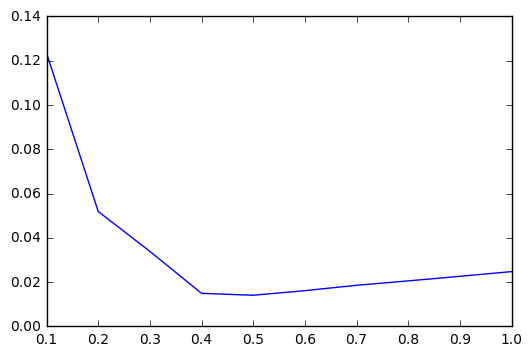

In [54]:
sqr_loss = []
for lambda_reg in np.arange(0.1,1.1,0.1):
    w,a,c = lasso_shooting(train_X,train_y,lambda_reg)
    validation_predict = validation_X.dot(w)
    diff = validation_predict - validation_y
    sqr_loss.append(1/validation_y.shape[0]*np.dot(diff,diff.T))
import matplotlib.pyplot as plt
plt.plot(np.arange(0.1,1.1,0.1),sqr_loss)
plt.show()

The sqaure loss on validation set reach minimun when $\lambda = 0.5$.

\newpage

# 3_1_2

In [36]:
w,a,c = lasso_shooting(train_X,train_y,lambda_reg=0.5)

lambda: 0.5 run_time: 18.43110227584839 steps_taken: 1000


In [37]:
threshold = 0.001
w[(w<threshold)&(w>-threshold)] = 0
# Measure the sparsity of result
len(w[10:][w[10:]!=0])

11

11 out of 65 zero values have been estimated to be non-zero. (threshold = 0.001)

\newpage

# 3_1_3

In [20]:
# Warstarting
lambda_max = max(2*np.abs(train_X.T.dot(train_y)))
def warm_start(X,y,lambda_reg=0.1,steps = 1000):
    #Get dimension info
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.zeros(d) # result w dimension: d
    def soft(a,delta):
        sign_a = np.sign(a)
        if np.abs(a)-delta <0:
            return 0 
        else:
            return sign_a*(abs(a)-delta)
    for step in range(steps):
        a = []
        c = []
    ####For loop for computing aj cj wj
        for j in range(d):
            aj = 0
            cj = 0
            for i in range(n):
                xij = X[i,j]
                aj += 2*xij*xij
                cj += 2*xij*(y[i]-w.T.dot(X[i,:])+w[j]*xij)
            w[j] = soft(cj/aj,lambda_reg/aj)
            a.append(aj)
            c.append(cj)
        a = np.array(a)
        c = np.array(c)
    return w,a,c

In [23]:
w_start,_,_ = warm_start(train_X,train_y,lambda_reg=lambda_max)
w_start

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

My warmstart meets error.

\newpage

# 3_1_4

In [49]:
def lasso_shooting_vectorize(X,y,lambda_reg=0.1,max_steps = 1000,tolerence = 1e-5):
    start_time = time.time()
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.linalg.inv(X.T.dot(X)+lambda_reg*np.identity(d)).dot(X.T).dot(y) # result w dimension: d
    steps = 0
    converge = False
    def soft(a,delta):
        sign_a = np.sign(a)
        pos_part = np.abs(a)-delta
        pos_part[pos_part<0] = 0  
        return sign_a*pos_part
    # Instead of loop calculate a c w using matrix operation
    # Store a c w into three d-dimension vector
    # a can be calculated using the diagonal elements of XT.X
    while converge==False and steps<max_steps:
        steps+=1
        old_w = w
        a = 2*X.T.dot(X).diagonal()
        # steps for calculating c
        # duplicate y-wx d times
        y_wx = np.tile(y-X.dot(w),(d,1))
        # duplicate w n times
        w_n = np.tile(w,(n,1))
        # elementwise multiplication of w_n and x
        wjxij =w_n*X
        # elementwise addition 
        right = y_wx.T + wjxij
        # return c
        c = 2*(X.T.dot(right).diagonal())
        w = soft(a/c,lambda_reg/a)
        convergence = np.sum(np.abs(w-old_w))<tolerence
        run_time = time.time()-start_time
    print('lambda:',lambda_reg,'run_time:',run_time,'steps_taken:',steps)
    return w

In [51]:
w = lasso_shooting_vectorize(train_X,train_y)

lambda: 0.1 run_time: 0.3244040012359619 steps_taken: 1000


Observe that the regularization path is significantly faster than using for_loop.